Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

## 1. Librerías

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.float_format", lambda x: "%.3f" % x)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score

%matplotlib inline

## 2. Presentacion de la data

In [341]:
train = pd.read_csv("/Users/ivanlamb/Documents/GitHub/Machine_Learning/Entregas/Prueba_Tecnica_Nivel/data/train.csv")

In [342]:
train.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.020,26.800,0.090,1.350,0.060,0.090,0.090,1.970,1.480,...,0.031,9.520,0.840,0.001,1.240,0.960,0.090,0.080,0.080,0
1,1709,1.130,3.950,0.320,3.950,0.030,4.660,0.560,1.890,1.360,...,0.170,13.830,1.150,0.006,10.550,3.760,0.020,0.450,0.060,0
2,7825,0.070,8.050,0.040,0.140,0.040,0.060,0.060,0.050,0.000,...,0.120,2.610,1.520,0.008,4.130,0.270,0.030,0.030,0.010,0
3,6918,0.090,26.400,0.030,0.920,0.090,0.570,0.000,0.360,0.030,...,0.055,5.220,1.960,0.000,11.320,0.250,0.090,0.010,0.050,0
4,5,0.940,14.470,0.030,2.880,0.003,0.800,0.430,1.380,0.110,...,0.135,9.750,1.890,0.006,27.170,5.420,0.080,0.190,0.020,1


In [343]:
print(train.shape)
print(train.info())

(5597, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    5597 non-null   float64
 6   col6    5597 non-null   float64
 7   col7    5597 non-null   float64
 8   col8    5597 non-null   float64
 9   col9    5597 non-null   float64
 10  col10   5597 non-null   float64
 11  col11   5597 non-null   float64
 12  col12   5597 non-null   float64
 13  col13   5597 non-null   float64
 14  col14   5597 non-null   float64
 15  col15   5597 non-null   float64
 16  col16   5597 non-null   float64
 17  col17   5597 non-null   float64
 18  col18   5597 non-null   float64
 19  col19   5597 non-null   float64
 20  col20   5597 non-null   float64
 21  target  5597 non-null   in

In [344]:
train.columns

Index(['ID', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8',
       'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16',
       'col17', 'col18', 'col19', 'col20', 'target'],
      dtype='object')

In [345]:
train.describe(include="all")

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.000,5597.000,5597.000,5597.000,5597.000,5597.000,5597.000,5597.000,5597.000,5597.000,...,5597.000,5597.000,5597.000,5597.000,5597.000,5597.000,5597.000,5597.000,5597.000,5597.000
mean,3962.910,0.675,14.439,0.164,1.580,0.043,2.213,0.251,0.808,0.766,...,0.100,9.819,1.332,0.005,16.621,2.932,0.050,0.150,0.045,0.114
std,2311.130,1.274,8.851,0.255,1.221,0.036,2.581,0.272,0.652,0.436,...,0.058,5.582,0.569,0.003,17.730,2.327,0.029,0.144,0.027,0.318
min,0.000,0.000,-0.080,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.001,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1963.000,0.040,6.850,0.030,0.550,0.008,0.100,0.050,0.090,0.400,...,0.049,4.940,1.010,0.003,2.220,0.820,0.020,0.040,0.020,0.000
50%,3922.000,0.070,14.390,0.050,1.210,0.040,0.550,0.090,0.750,0.760,...,0.103,9.860,1.420,0.005,7.840,2.430,0.050,0.080,0.050,0.000
75%,5960.000,0.290,22.260,0.100,2.510,0.070,4.330,0.450,1.390,1.160,...,0.151,14.690,1.760,0.008,29.980,4.670,0.070,0.250,0.070,0.000
max,7993.000,5.050,29.840,1.050,4.940,0.130,8.660,0.900,2.000,1.500,...,0.200,19.820,2.890,0.010,60.010,7.990,0.100,0.500,0.090,1.000


In [346]:
train.isnull().sum()

ID        0
col1      0
col2      0
col3      0
col4      0
col5      0
col6      0
col7      0
col8      0
col9      0
col10     0
col11     0
col12     0
col13     0
col14     0
col15     0
col16     0
col17     0
col18     0
col19     0
col20     0
target    0
dtype: int64

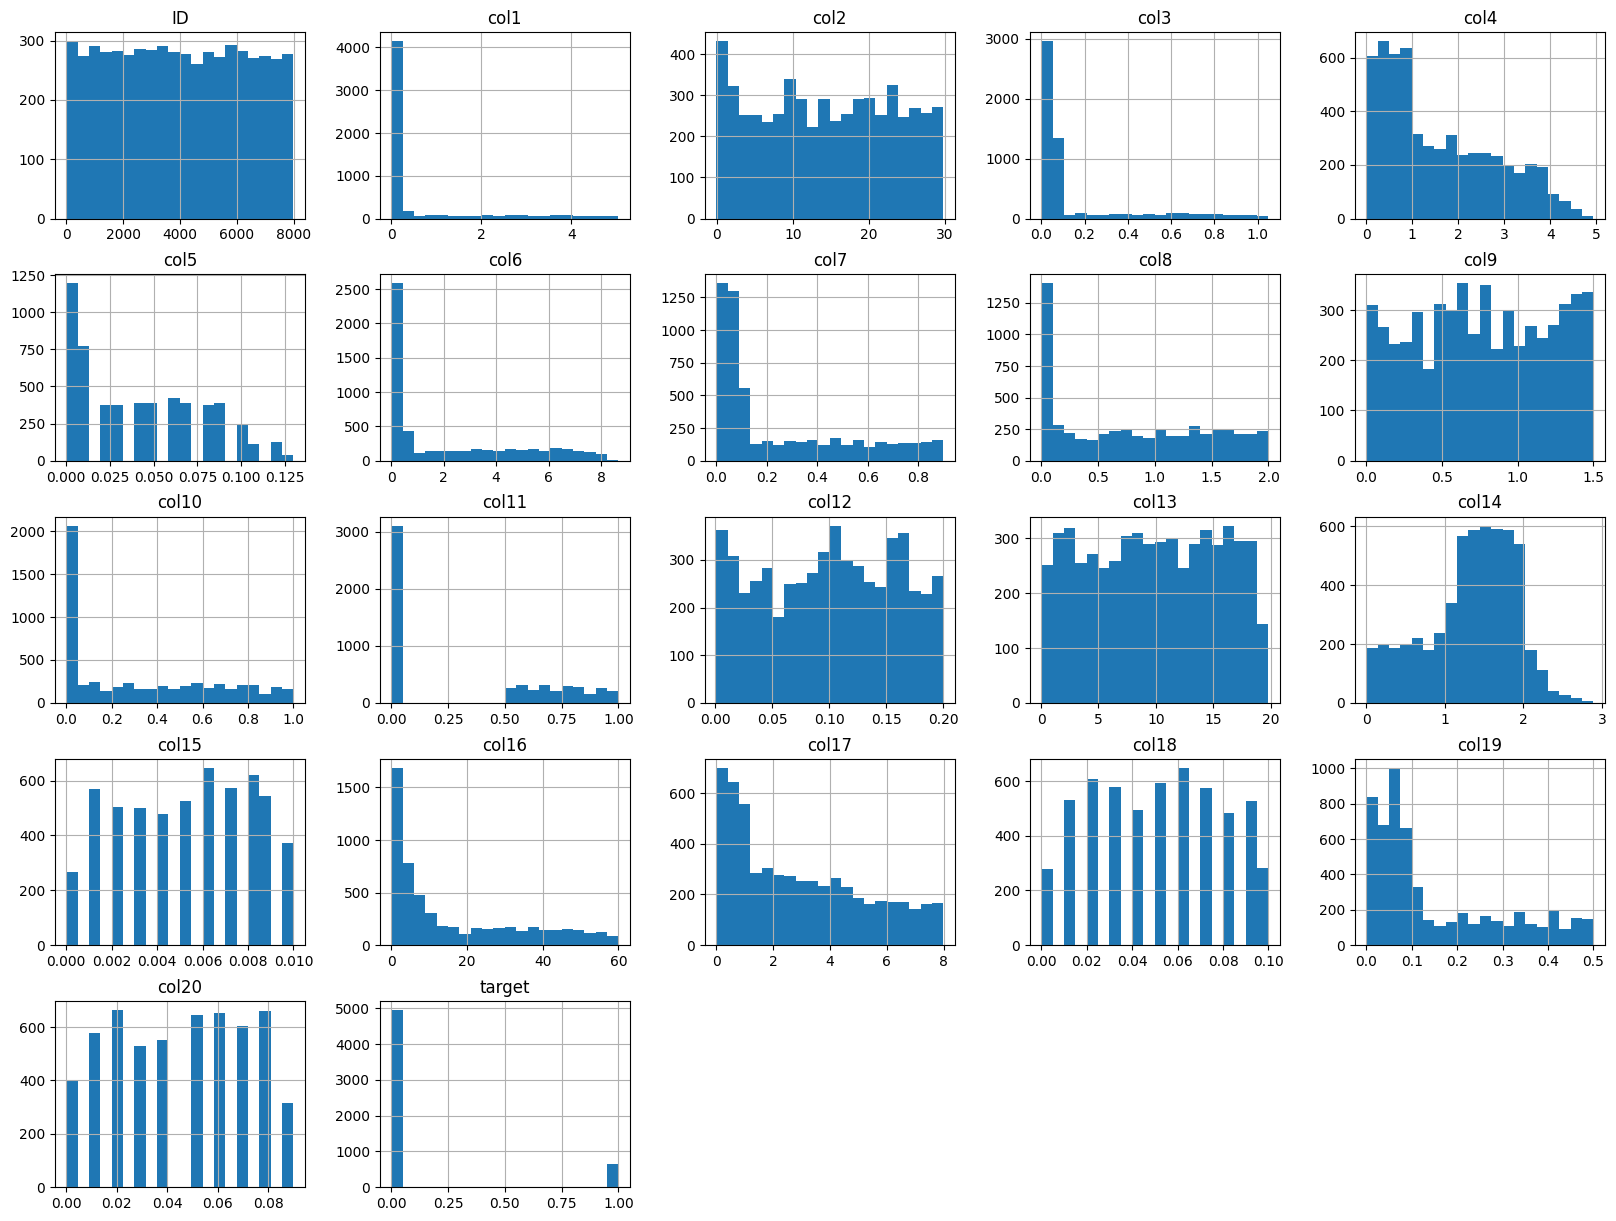

In [347]:
train.hist(bins=20, figsize=(20,15));

## 3. Análisis de la data

count   5597.000
mean       0.675
std        1.274
min        0.000
25%        0.040
50%        0.070
75%        0.290
max        5.050
Name: col1, dtype: float64


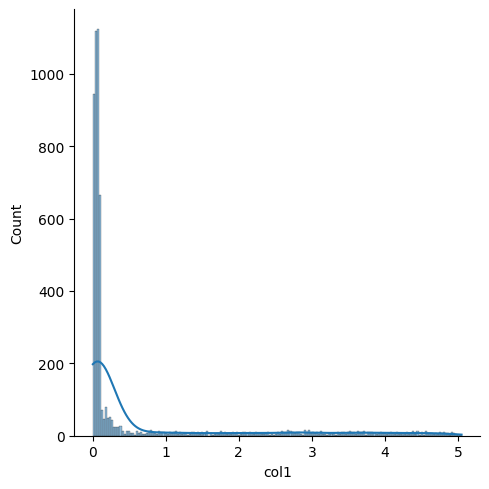

In [348]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col1"].describe())

#Visualizamos
sns.displot(data=train, x="col1", kde=True);

count   5597.000
mean      14.439
std        8.851
min       -0.080
25%        6.850
50%       14.390
75%       22.260
max       29.840
Name: col2, dtype: float64


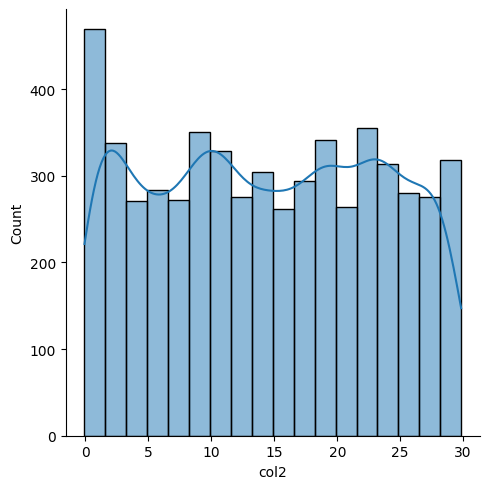

In [349]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col2"].describe())

#Visualizamos
sns.displot(data=train, x="col2", kde=True);


count   5597.000
mean       0.164
std        0.255
min        0.000
25%        0.030
50%        0.050
75%        0.100
max        1.050
Name: col3, dtype: float64


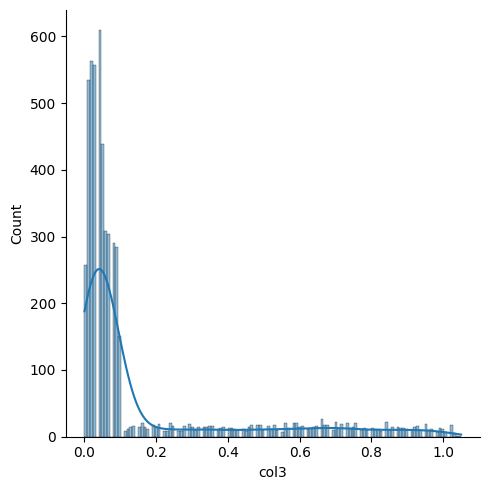

In [350]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col3"].describe())

#Visualizamos
sns.displot(data=train, x="col3", kde=True);


count   5597.000
mean       1.580
std        1.221
min        0.000
25%        0.550
50%        1.210
75%        2.510
max        4.940
Name: col4, dtype: float64


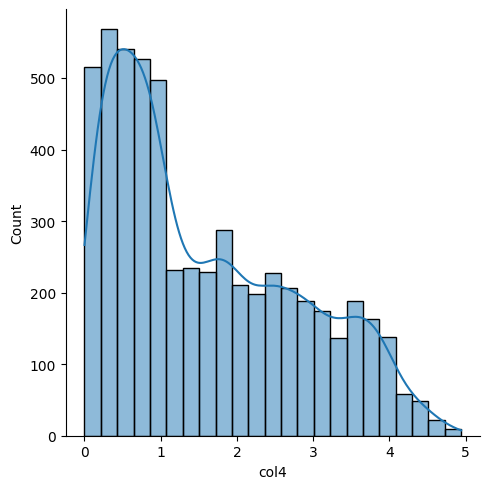

In [351]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col4"].describe())

#Visualizamos
sns.displot(data=train, x="col4", kde=True);


count   5597.000
mean       0.043
std        0.036
min        0.000
25%        0.008
50%        0.040
75%        0.070
max        0.130
Name: col5, dtype: float64


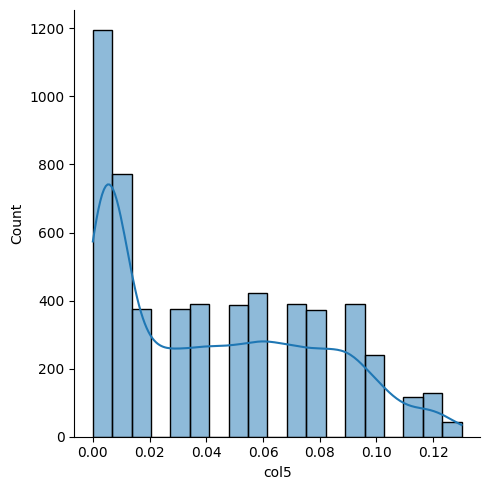

In [352]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col5"].describe())

#Visualizamos
sns.displot(data=train, x="col5", kde=True);


count   5597.000
mean       2.213
std        2.581
min        0.000
25%        0.100
50%        0.550
75%        4.330
max        8.660
Name: col6, dtype: float64


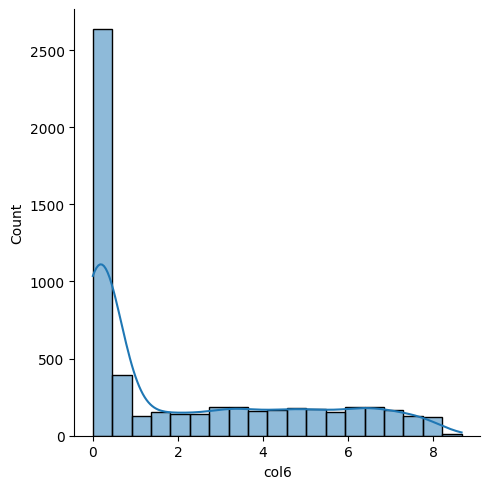

In [353]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col6"].describe())

#Visualizamos
sns.displot(data=train, x="col6", kde=True);


count   5597.000
mean       0.251
std        0.272
min        0.000
25%        0.050
50%        0.090
75%        0.450
max        0.900
Name: col7, dtype: float64


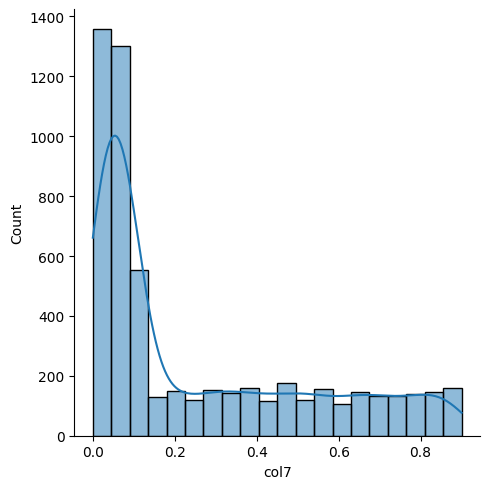

In [354]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col7"].describe())

#Visualizamos
sns.displot(data=train, x="col7", kde=True);


count   5597.000
mean       0.808
std        0.652
min        0.000
25%        0.090
50%        0.750
75%        1.390
max        2.000
Name: col8, dtype: float64


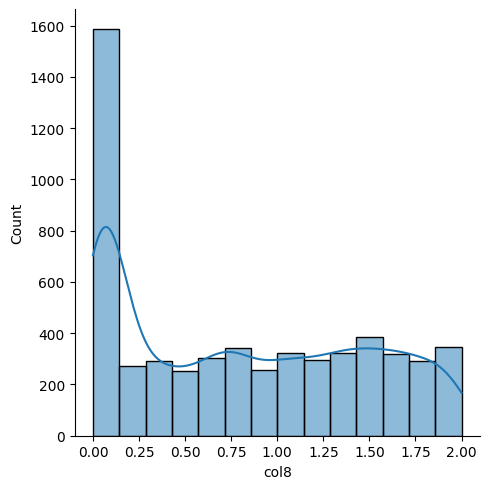

In [355]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col8"].describe())

#Visualizamos
sns.displot(data=train, x="col8", kde=True);


count   5597.000
mean       0.766
std        0.436
min        0.000
25%        0.400
50%        0.760
75%        1.160
max        1.500
Name: col9, dtype: float64


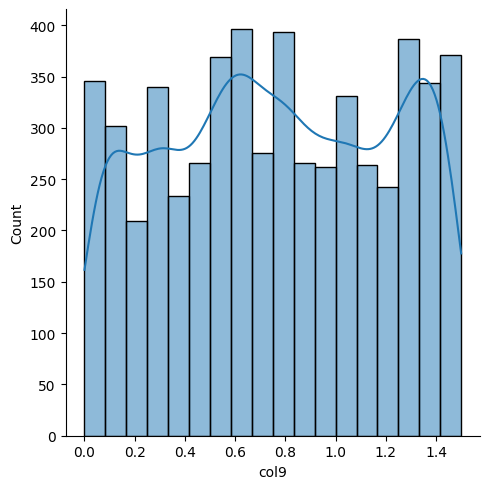

In [356]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col9"].describe())

#Visualizamos
sns.displot(data=train, x="col9", kde=True);


count   5597.000
mean       0.324
std        0.329
min        0.000
25%        0.000
50%        0.230
75%        0.610
max        1.000
Name: col10, dtype: float64


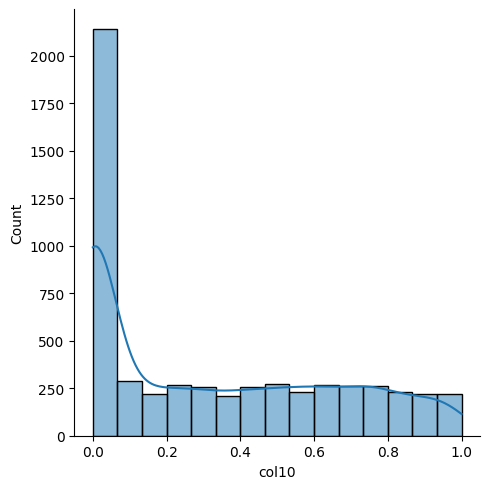

In [357]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col10"].describe())

#Visualizamos
sns.displot(data=train, x="col10", kde=True);


count   5597.000
mean       0.330
std        0.377
min        0.000
25%        0.002
50%        0.008
75%        0.700
max        1.000
Name: col11, dtype: float64


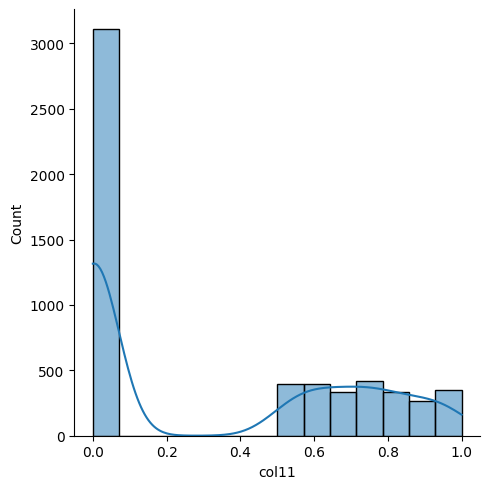

In [358]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col11"].describe())

#Visualizamos
sns.displot(data=train, x="col11", kde=True);


count   5597.000
mean       0.100
std        0.058
min        0.001
25%        0.049
50%        0.103
75%        0.151
max        0.200
Name: col12, dtype: float64


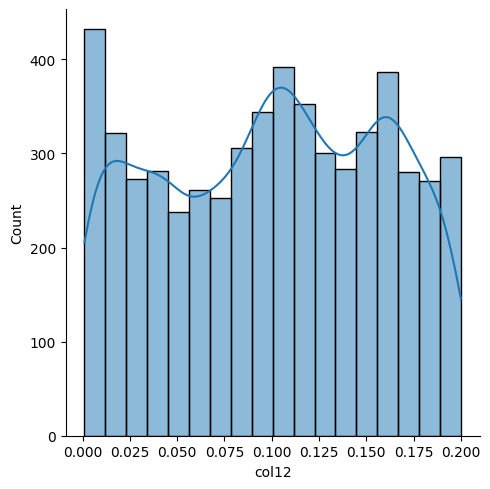

In [359]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col12"].describe())

#Visualizamos
sns.displot(data=train, x="col12", kde=True);


count   5597.000
mean       9.819
std        5.582
min        0.010
25%        4.940
50%        9.860
75%       14.690
max       19.820
Name: col13, dtype: float64


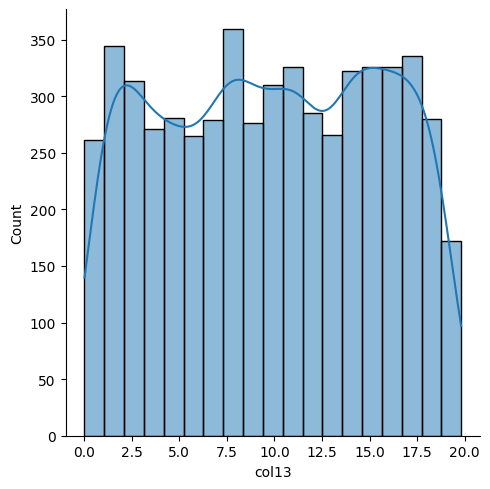

In [360]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col13"].describe())

#Visualizamos
sns.displot(data=train, x="col13", kde=True);


count   5597.000
mean       1.332
std        0.569
min        0.000
25%        1.010
50%        1.420
75%        1.760
max        2.890
Name: col14, dtype: float64


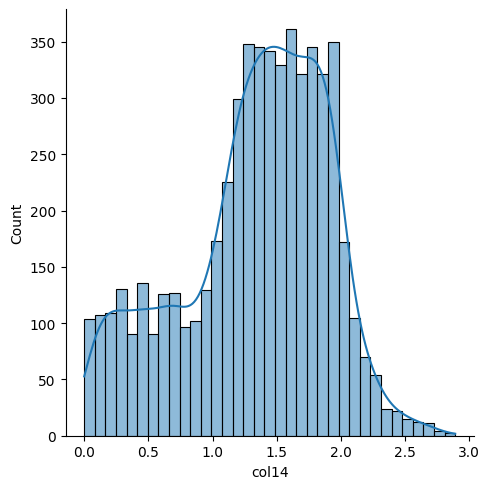

In [361]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col14"].describe())

#Visualizamos
sns.displot(data=train, x="col14", kde=True);


count   5597.000
mean       0.005
std        0.003
min        0.000
25%        0.003
50%        0.005
75%        0.008
max        0.010
Name: col15, dtype: float64


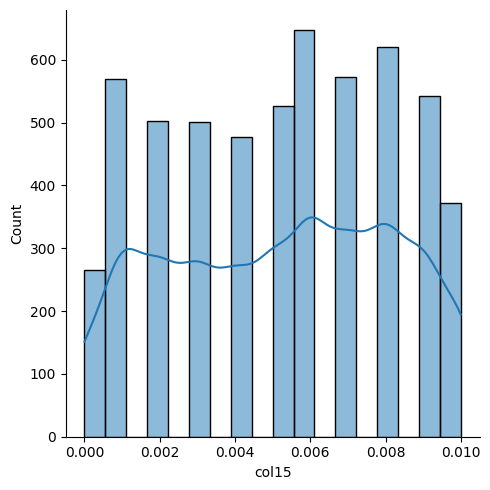

In [362]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col15"].describe())

#Visualizamos
sns.displot(data=train, x="col15", kde=True);


count   5597.000
mean      16.621
std       17.730
min        0.000
25%        2.220
50%        7.840
75%       29.980
max       60.010
Name: col16, dtype: float64


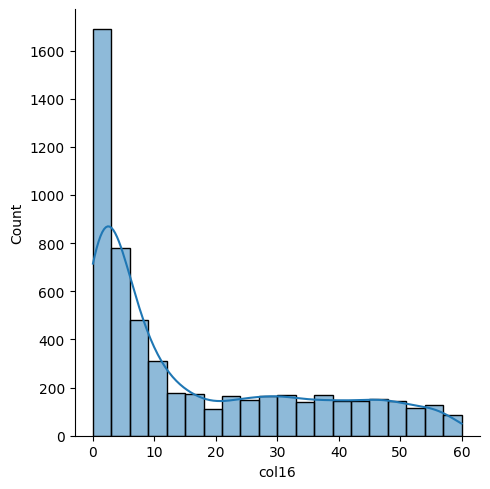

In [363]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col16"].describe())

#Visualizamos
sns.displot(data=train, x="col16", kde=True);


count   5597.000
mean       2.932
std        2.327
min        0.000
25%        0.820
50%        2.430
75%        4.670
max        7.990
Name: col17, dtype: float64


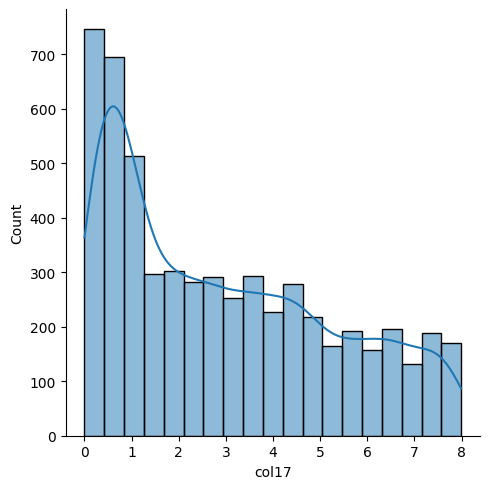

In [364]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col17"].describe())

#Visualizamos
sns.displot(data=train, x="col17", kde=True);


count   5597.000
mean       0.050
std        0.029
min        0.000
25%        0.020
50%        0.050
75%        0.070
max        0.100
Name: col18, dtype: float64


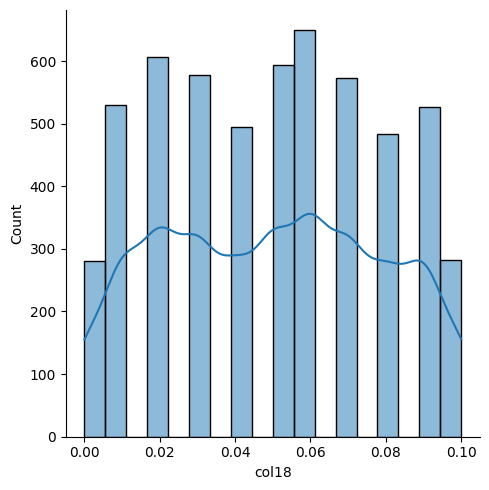

In [365]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col18"].describe())

#Visualizamos
sns.displot(data=train, x="col18", kde=True);


count   5597.000
mean       0.150
std        0.144
min        0.000
25%        0.040
50%        0.080
75%        0.250
max        0.500
Name: col19, dtype: float64


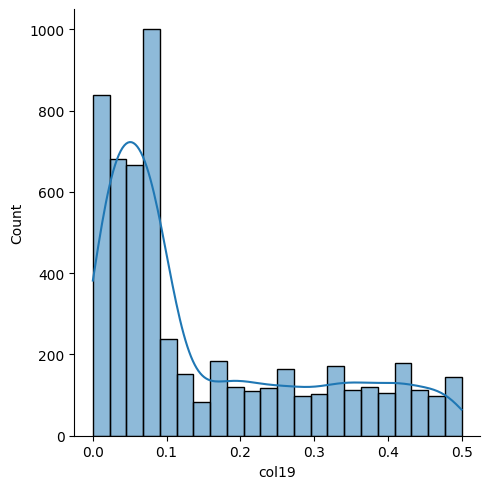

In [366]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col19"].describe())

#Visualizamos
sns.displot(data=train, x="col19", kde=True);


count   5597.000
mean       0.045
std        0.027
min        0.000
25%        0.020
50%        0.050
75%        0.070
max        0.090
Name: col20, dtype: float64


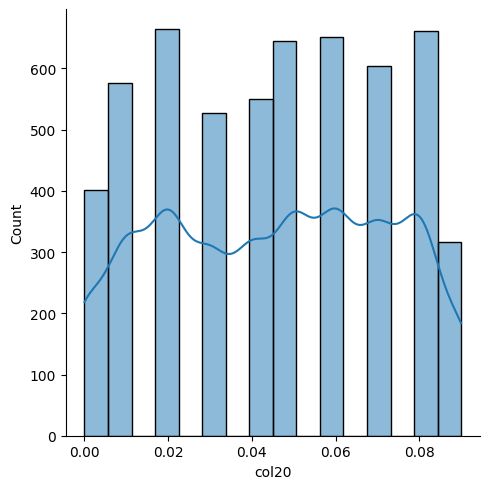

In [367]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["col20"].describe())

#Visualizamos
sns.displot(data=train, x="col20", kde=True);


count   5597.000
mean       0.114
std        0.318
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        1.000
Name: target, dtype: float64


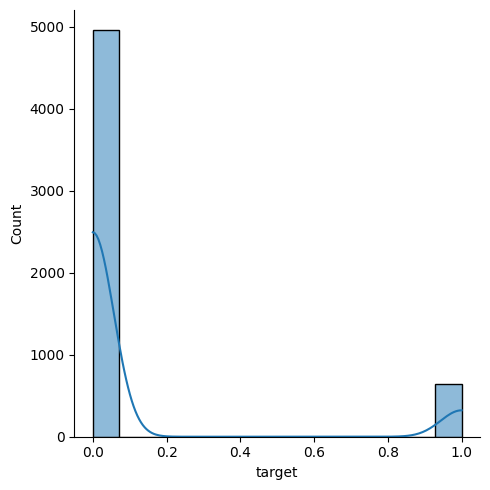

In [368]:
# Vemos la media, percentiles y máximos, mínimos, desviacion estandar, etc
print(train["target"].describe())

#Visualizamos
sns.displot(data=train, x="target", kde=True);

### Mapa de correlacion

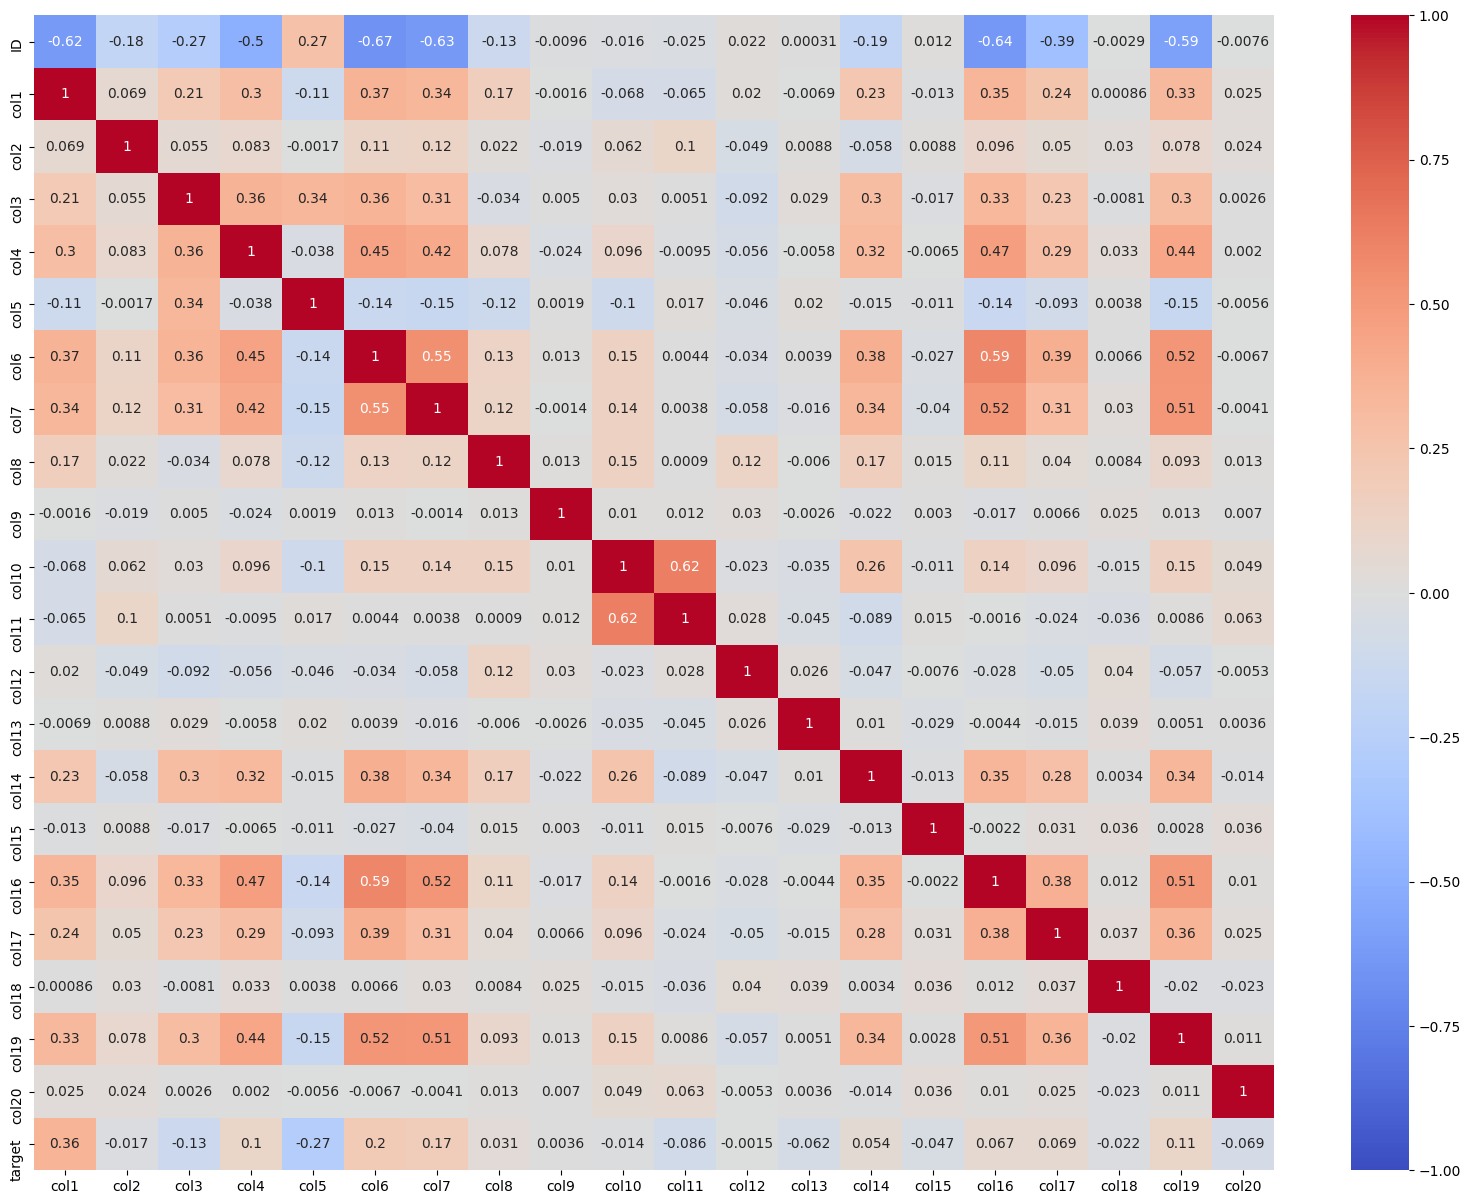

In [369]:
#Visualizamos
plt.figure(figsize=(20,15))
sns.heatmap(train.corr().drop(columns=["ID", "target"]), annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0);

## 4. Procesamiento de la data

In [370]:
# Observamos un target desbalanceado
train['target'].value_counts()/len(train['target'])*100

target
0   88.565
1   11.435
Name: count, dtype: float64

## 5. Preparacion del modelo

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [372]:
scaler = StandardScaler()

In [373]:
scaler_X_train = scaler.fit_transform(X_train)

In [374]:
scaler_X_test = scaler.transform(X_test)

In [375]:
X = train.drop(['target'], axis=1)
y = train['target'].copy()
X.shape

(5597, 21)

In [376]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

under_sampler = RandomUnderSampler(random_state=42)

X_train_balanced, y_train_balanced = under_sampler.fit_resample(X_train, y_train)


In [378]:
# Observamos un target desbalanceado
train['target'].value_counts()/len(train['target'])*100

target
0   88.565
1   11.435
Name: count, dtype: float64

## 6. Modelos de clasificación y evaluación:

#### 6.1 Logistic Regression

In [207]:
log_model = LogisticRegression()

In [208]:
log_model.fit(scaler_X_train,y_train)

LogisticRegression()

In [209]:
pred_lg = log_model.predict(scaler_X_test)

In [210]:
print("ROC:",roc_auc_score(y_test, pred_lg)*100)
print("Accuracy:",accuracy_score(y_test, pred_lg)*100)
print("Precision:",precision_score(y_test, pred_lg)*100)

ROC: 78.76434349460949
Accuracy: 93.75
Precision: 81.56028368794325


#### 6.2 **Decision Tree Classifier**

In [211]:
dt = DecisionTreeClassifier()

In [212]:
dt.fit(scaler_X_train,y_train)

DecisionTreeClassifier()

In [213]:
pred_dt = dt.predict(scaler_X_test)

In [214]:
print("ROC:",roc_auc_score(y_test, pred_dt)*100)
print("Accuracy:",accuracy_score(y_test, pred_dt)*100)
print("Precision:",precision_score(y_test, pred_dt)*100)

ROC: 92.4799850147771
Accuracy: 96.60714285714286
Precision: 84.07960199004975


#### 6.3 Decision Tree Regressor

In [215]:
dtr = DecisionTreeRegressor()

In [216]:
dtr.fit(scaler_X_train,y_train)

DecisionTreeRegressor()

In [217]:
pred_dtr = dtr.predict(scaler_X_test)

In [218]:
print("ROC:",roc_auc_score(y_test, pred_dtr)*100)
print("Accuracy:",accuracy_score(y_test, pred_dtr)*100)
print("Precision:",precision_score(y_test, pred_dtr)*100)

ROC: 93.61185497634277
Accuracy: 97.02380952380952
Precision: 85.64356435643565


#### 6.4 KNN

In [219]:
knn = KNeighborsClassifier()

In [220]:
knn.fit(scaler_X_train,y_train)

KNeighborsClassifier()

In [221]:
pred_knn = knn.predict(scaler_X_test)

In [222]:
print("ROC:",roc_auc_score(y_test, pred_knn)*100)
print("Accuracy:",accuracy_score(y_test, pred_knn)*100)
print("Precision:",precision_score(y_test, pred_knn)*100)

ROC: 71.82778093824145
Accuracy: 91.78571428571428
Precision: 72.95081967213115


#### 6.5 SVM

In [223]:
svm = SVC()

In [224]:
svm.fit(scaler_X_train,y_train)

SVC()

In [225]:
pred_svm = svm.predict(scaler_X_test)

In [226]:
print("ROC:",roc_auc_score(y_test, pred_svm)*100)
print("Accuracy:",accuracy_score(y_test, pred_svm)*100)
print("Precision:",precision_score(y_test, pred_svm)*100)

ROC: 82.70906467233699
Accuracy: 95.17857142857142
Precision: 88.96551724137932


## 7. Predicción

Tras valorar los distintos modelos de clasificación junto con sus métricas. Se establece que el modelo de "Decision Tree Classifier" es el que tiene mejores resultados.
Procedemos a hacer la predicción con el resto de datos

In [227]:
X_pred = pd.read_csv("/Users/ivanlamb/Documents/GitHub/Machine_Learning/Entregas/Prueba_Tecnica_Nivel/data/test.csv")
X_pred.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20
0,2816,0.060,25.180,0.040,0.040,0.001,5.100,0.860,1.230,0.520,...,0.620,0.022,12.630,1.930,0.003,1.190,7.790,0.040,0.430,0.010
1,3641,0.090,27.510,0.630,2.050,0.110,6.810,0.830,0.090,1.210,...,0.730,0.001,4.490,1.950,0.009,52.300,1.000,0.100,0.120,0.010
2,7191,0.090,1.100,0.070,0.730,0.050,0.100,0.010,1.440,1.420,...,0.007,0.177,1.030,1.270,0.002,7.040,0.380,0.060,0.050,0.060
3,5199,0.070,11.230,0.040,1.220,0.030,0.160,0.030,1.180,0.880,...,0.001,0.032,4.070,0.980,0.003,1.280,0.510,0.060,0.030,0.070
4,7994,0.010,10.000,0.010,2.000,0.000,2.000,0.000,0.090,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [228]:
predictions_submit = dt.predict(X_pred)